# To perform Extraction, Transformation and Loading for Pharmaceutical data




## Background: 
Our team is interested in working with healthcare data. We are aiming to look into pharmaceutical spending across the globe, to determine which countries have the highest spending percentage and how much each country is spending on off the shelf pharmaceutical medicines. Data will be extracted from the sources listed below, transformed using Python, Pandas and SQL, and loaded into PostgreSQL. We will then present our ETL project via an html file using Flask. This can be used by pharmaceutical companies to promote products globally.


## Data

POPULATION : https://datahub.io/core/population#pandas

PHARMACEUTICAL_SPENDING : https://data.oecd.org/healthres/pharmaceutical-spending.htm#indicator-chart
        
        

In [1]:
# Importing required packages

import datapackage
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt



## Extraction: Data 1 - Population data from JSON file

In [2]:
data_url = 'https://datahub.io/core/population/datapackage.json'
package = datapackage.Package(data_url)

# To load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)

      Country Name Country Code  Year      Value
0       Arab World          ARB  1960   92197753
1       Arab World          ARB  1961   94724510
2       Arab World          ARB  1962   97334442
3       Arab World          ARB  1963  100034179
4       Arab World          ARB  1964  102832760
...            ...          ...   ...        ...
15404     Zimbabwe          ZWE  2014   13586681
15405     Zimbabwe          ZWE  2015   13814629
15406     Zimbabwe          ZWE  2016   14030390
15407     Zimbabwe          ZWE  2017   14236745
15408     Zimbabwe          ZWE  2018   14439018

[15409 rows x 4 columns]
      Country Name Country Code  Year      Value
0       Arab World          ARB  1960   92197753
1       Arab World          ARB  1961   94724510
2       Arab World          ARB  1962   97334442
3       Arab World          ARB  1963  100034179
4       Arab World          ARB  1964  102832760
...            ...          ...   ...        ...
15404     Zimbabwe          ZWE  2014   135

In [3]:
# To convert into dataframe

population = pd.DataFrame(data)
population.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92197753
1,Arab World,ARB,1961,94724510
2,Arab World,ARB,1962,97334442
3,Arab World,ARB,1963,100034179
4,Arab World,ARB,1964,102832760


## Transformation

In [4]:
# Filtering based on year 
n_population = population[population.Year == 2018]
n_population.head()

,Country Name,Country Code,Year,Value
58,Arab World,ARB,2018,419790588
117,Caribbean small states,CSS,2018,7358965
176,Central Europe and the Baltics,CEB,2018,102511922
235,Early-demographic dividend,EAR,2018,3249140605
294,East Asia & Pacific,EAS,2018,2328220870


In [5]:
type(n_population)

pandas.core.frame.DataFrame

In [6]:
# Describing data
n_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 58 to 15408
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  262 non-null    object
 1   Country Code  262 non-null    object
 2   Year          262 non-null    int64 
 3   Value         262 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 10.2+ KB


In [7]:
#Changing the datatype of the column

n_population['Country Name'] = n_population['Country Name'].astype('str')
n_population['Country Code'] = n_population['Country Code'].astype('str')



<ipython-input-7-911240fdbb1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_population['Country Name'] = n_population['Country Name'].astype('str')
<ipython-input-7-911240fdbb1f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_population['Country Code'] = n_population['Country Code'].astype('str')


In [8]:
# Retrieving the required columns 
population_df = n_population[['Country Code','Country Name','Value']]
population_df.head()

,Country Code,Country Name,Value
58,ARB,Arab World,419790588
117,CSS,Caribbean small states,7358965
176,CEB,Central Europe and the Baltics,102511922
235,EAR,Early-demographic dividend,3249140605
294,EAS,East Asia & Pacific,2328220870


In [9]:
# Renaming the columns
population_df = population_df.rename(columns={'Country Name':'country','Country Code':'country_code','Value':'population'})


In [10]:
# Final population dataframe
population_df.head()

,country_code,country,population
58,ARB,Arab World,419790588
117,CSS,Caribbean small states,7358965
176,CEB,Central Europe and the Baltics,102511922
235,EAR,Early-demographic dividend,3249140605
294,EAS,East Asia & Pacific,2328220870


## Extraction: Data 2 - Pharmaceutical spending data from CSV file

In [11]:
pharma_df = pd.read_csv("health_data.csv")

In [12]:
pharma_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1971,15.992,NaN
1,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1972,15.091,NaN
2,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1973,15.117,NaN
3,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1974,14.771,NaN
4,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1975,11.849,NaN


## Transformartion

In [13]:
# Removing unwanted column

pharma_df = pharma_df.drop('Flag Codes', axis = 1)

In [14]:
pharma_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1971,15.992
1,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1972,15.091
2,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1973,15.117
3,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1974,14.771
4,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1975,11.849


In [15]:
# Filtering based on year

n_pharma = pharma_df[pharma_df.TIME == 2018]
n_pharma.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
47,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,2018,13.839
76,AUT,PHARMAEXP,TOT,PC_HEALTHXP,A,2018,11.927
121,BEL,PHARMAEXP,TOT,PC_HEALTHXP,A,2018,11.333
171,CAN,PHARMAEXP,TOT,PC_HEALTHXP,A,2018,16.130
201,CZE,PHARMAEXP,TOT,PC_HEALTHXP,A,2018,16.033


In [16]:
# Filter based on % of pharmaceutical spending
n_pharma = n_pharma[n_pharma.MEASURE == 'PC_HEALTHXP']
n_pharma.reset_index(inplace = True)
n_pharma

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,47,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,2018,13.839
1,76,AUT,PHARMAEXP,TOT,PC_HEALTHXP,A,2018,11.927
2,121,BEL,PHARMAEXP,TOT,PC_HEALTHXP,A,2018,11.333
3,171,CAN,PHARMAEXP,TOT,PC_HEALTHXP,A,2018,16.130
4,201,CZE,PHARMAEXP,TOT,PC_HEALTHXP,A,2018,16.033
5,241,DNK,PHARMAEXP,TOT,PC_HEALTHXP,A,2018,6.403
6,291,FIN,PHARMAEXP,TOT,PC_HEALTHXP,A,2018,12.392
7,325,FRA,PHARMAEXP,TOT,PC_HEALTHXP,A,2018,12.357
8,374,DEU,PHARMAEXP,TOT,PC_HEALTHXP,A,2018,14.172
9,406,GRC,PHARMAEXP,TOT,PC_HEALTHXP,A,2018,26.144


In [17]:
type(n_pharma)

pandas.core.frame.DataFrame

In [18]:
# Describing data
n_pharma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      39 non-null     int64  
 1   LOCATION   39 non-null     object 
 2   INDICATOR  39 non-null     object 
 3   SUBJECT    39 non-null     object 
 4   MEASURE    39 non-null     object 
 5   FREQUENCY  39 non-null     object 
 6   TIME       39 non-null     int64  
 7   Value      39 non-null     float64
dtypes: float64(1), int64(2), object(5)
memory usage: 2.6+ KB


In [19]:
# Changing data type

n_pharma['LOCATION'] = n_pharma['LOCATION'].astype('str')

In [20]:
# Selecting required columns

pharma_spending_df = n_pharma[['LOCATION','Value']]


In [21]:
# Final Pharmaceutical data 

pharma_spending_df = pharma_spending_df.rename(columns = {'LOCATION':'country_code','Value':'percent_pharmaceutical_spending'})
pharma_spending_df.head()

,country_code,percent_pharmaceutical_spending
0,AUS,13.839
1,AUT,11.927
2,BEL,11.333
3,CAN,16.130
4,CZE,16.033


## Connect to Postgres SQL

In [22]:
connection_string = "postgres:postgres@localhost:5432/pharma_db"
engine = create_engine(f'postgresql://{connection_string}')

In [23]:
engine.table_names()

<ipython-input-23-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['pharma_spending', 'population']

### Use pandas to load JSON converted DataFrame into database

In [24]:

# We can only add once as country_code column has primary key constarint in db

# population_df.to_sql(name='population', con=engine, if_exists='append', index=False)

### Use pandas to load csv converted DataFrame into database

In [25]:
# We can only add once as country_code column has primary key constarint in db

# pharma_spending_df.to_sql(name='pharma_spending', con=engine, if_exists='append', index=False)

## Joining the datas

In [26]:
global_pharmaceutical_spending_df = pd.merge(population_df, pharma_spending_df )
global_pharmaceutical_spending_df.head(5)

,country_code,country,population,percent_pharmaceutical_spending
0,AUS,Australia,24982688,13.839
1,AUT,Austria,8840521,11.927
2,BEL,Belgium,11433256,11.333
3,BGR,Bulgaria,7025037,35.409
4,CAN,Canada,37057765,16.130


In [27]:
global_pharmaceutical_spending_df = global_pharmaceutical_spending_df.sort_values(by=['percent_pharmaceutical_spending'], ascending=False)
global_pharmaceutical_spending_df.head(5)

,country_code,country,population,percent_pharmaceutical_spending
3,BGR,Bulgaria,7025037,35.409
15,HUN,Hungary,9775564,26.922
21,LVA,Latvia,1927174,26.487
14,GRC,Greece,10731726,26.144
32,SVK,Slovak Republic,5446771,25.513


## Visualization - Bar graph

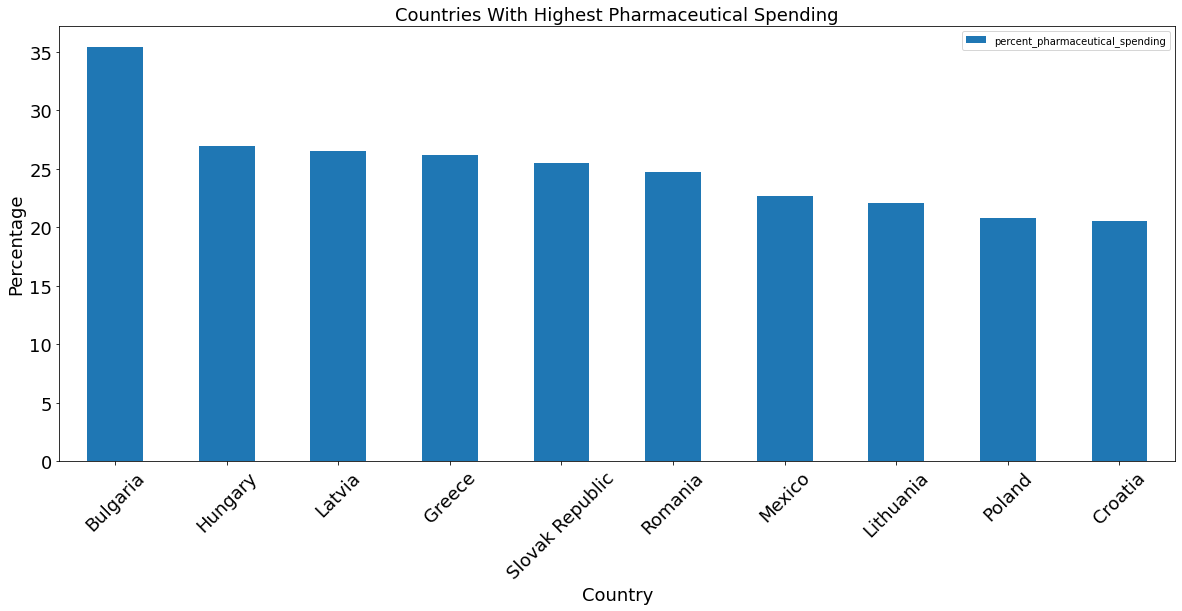

<Figure size 432x288 with 0 Axes>

In [28]:
pharmaceutical_spending = global_pharmaceutical_spending_df[['country',"percent_pharmaceutical_spending"]].sort_values(['percent_pharmaceutical_spending'], ascending = False).head(10)
multi_plot = pharmaceutical_spending.plot(kind="bar", figsize=(20,8), fontsize='18')

multi_plot.set_xticklabels(pharmaceutical_spending["country"], rotation=45, fontsize='18')
plt.title("Countries With Highest Pharmaceutical Spending", fontsize='18')
plt.xlabel("Country", fontsize='18')
plt.ylabel("Percentage", fontsize='18')
plt.show()
plt.tight_layout()
plt.savefig('Resources/assets/images/top10pharmaspending.png')

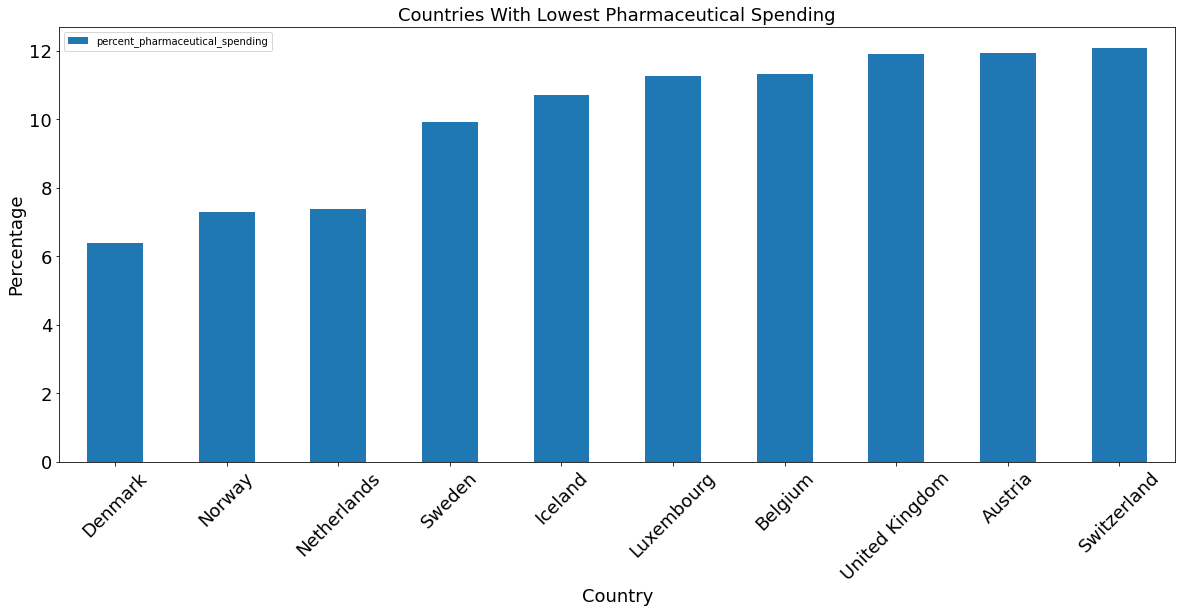

<Figure size 432x288 with 0 Axes>

In [29]:
pharmaceutical_spending = global_pharmaceutical_spending_df[['country',"percent_pharmaceutical_spending"]].sort_values(['percent_pharmaceutical_spending'], ascending = True).head(10)
multi_plot = pharmaceutical_spending.plot(kind="bar", figsize=(20,8), fontsize='18')

multi_plot.set_xticklabels(pharmaceutical_spending["country"], rotation=45, fontsize='18')
plt.title("Countries With Lowest Pharmaceutical Spending", fontsize='18')
plt.xlabel("Country", fontsize='18')
plt.ylabel("Percentage", fontsize='18')
plt.show()
plt.tight_layout()
plt.savefig('Resources/assets/images/least10pharmaspending.png')